# TP1 : Révisions, algorithmes de tri

Les objectifs de ce TP sont :
- remobiliser les notions vues en L1, notamment 
    - les bases de l'algorithmique (boucles, variables,...)
    - les fonctions
    - le type liste
- aborder un ou plusieurs algorithmes de tri et la notion de complexité

## Échauffement

**Exercice 1 :**

En échauffement, nous allons implémenter une fonction permettant d'échanger la position de deux éléments au sein d'une liste. Cette fonction vous sera utile ultérieurement pour implémenter votre tri.

Votre programme ne doit pas créer de nouvelle liste, mais modifier celle passée en entrée. **La fonction ne nécessite donc pas de `return` !**

Vous pouvez vous appuyer sur le squelette ci-dessous, qui donne le nom de la fonction, ses paramètres, et la docstring :

```python
def echanger(l, i, j) :
    """
    echange les elements aux positions i et j au sein de la liste l.
    i et j sont des entiers compris entre 0 (inclus) et la taille de l (exclus).
    exemple d’utilisation: 
    >>> l = [1, 2, 3, 4] 
    >>> echanger(l, 0, 2) 
    >>> print(l)
    [3, 2, 1, 4]
    """
    # À compléter dans la cellule suivante
```

In [76]:
def echanger(l, i, j) :
    stock = l[i]
    l[i] = l[j]
    l[j] = stock

In [ ]:
# VÉRIF
liste_test = [1, 3, 6, 9]
echanger(liste_test, 1, 3)
print(liste_test==[1, 9, 6, 3]) #True si égalité des listes, False sinon

**Exercice 2 :**

Pour tester notre algorithme de tri de manière systématique il nous faudra générer différentes données d'entrée. 

Pour cela écrivez une fonction `def construit_liste_aleatoire(N):` qui retourne une liste de taille N dont les entrées sont entiers choisis au hasard avec `random.randint` entre 0 et 1000 

*(vous pouvez trouver une documentation et un exemple d'utilisation de la fonction `randint` ici : https://www.w3schools.com/python/ref_random_randint.asp)*



In [ ]:
import random
def construit_liste_aleatoire(N):
    L = []
    for i in range(N):
        L.append(random.randint(0,1000))
    return L

In [ ]:
# VÉRIF
print(type(construit_liste_aleatoire(100))==list) # On vérifie que l'on construit bien une liste
print(len(construit_liste_aleatoire(100))==100) # On vérifie sa longueur

**Exercice 3 :**

Enfin, écrivez une fonction `est_croissante(liste)` qui retourne `True` si `liste` est rangée en ordre croissant et `False` sinon.

In [ ]:
def est_croissante(liste):
    for pos in range(1, len(liste)):
        if liste[pos-1] > liste[pos]:
            return False
    return True

In [9]:
# VÉRIF
print(type(est_croissante([1, 2, 3, 4]))==bool) # On vérifie que l'on retourne bien un booléen
print(est_croissante([1, 2, 3, 4])==True) # On teste
print(est_croissante([1, 2, 3, 2])==False)
print(est_croissante([3, 2, 3, 4])==False)

True
True
True
True


## Algorithme de Tri

**Exercice 4 :**

Écrivez une fonction `trier` qui prends en argument une liste et la range en ordre croissant

*Implémentez de préférence la méthode mise au point par votre groupe. Si vous n’avez pas eu le temps de mettre au point un algorithme de tri complet avec votre groupe, implémentez le **tri selection** expliqué en **Annexe 1**.*

Votre programme ne doit pas créer de nouvelle liste, mais modifier celle passée en entrée. **La fonction ne nécessite donc pas de `return` !**

Vous pouvez vous servir du squelette ci-dessous:
```python
def trier(liste): 
    """
    trie les elements de liste de maniere croissante. 
    exemple d’utilisation:
    >>> liste = [4, 5, 1, 8, 3, 2, 9, 2, 15, −3]) 
    >>> trier(liste)
    >>> print(liste)
    [−3, 1, 2, 2, 3, 4, 5, 8, 9, 15]
    """
    # À compléter dans la cellule suivante
```

Testez sur plusieurs listes aléatoires votre algorithme de tri et vérifiez son bon fonctionnement grâce à la fonction `est_croissante`, assurez vous qu’il marche dans tous les cas testés. 

In [77]:
# Ici, on code le tri par sélection. En annexe, on donne d'autres exemples de tri.
def trier(liste):
    for i in range(len(liste)-1) :
        pos_mini = i
        mini = liste[pos_mini]
        for j in range(i+1, len(liste)) :
            if liste[j] < mini :
                mini = liste[j]
                pos_mini = j
        echanger(liste, i, pos_mini)

# autre possibilité (stratégie un peu différente, qui demande autant de comparaisons mais plus d'échanges)
"""
def trier(liste):
    for i in range(len(liste)-1):
        for j in range(i+1, len(liste)):
            if liste[i] > liste[j]:
                echanger(liste, i, j)
"""

'\ndef trier(liste):\n    for i in range(len(liste)-1):\n        for j in range(i+1, len(liste)):\n            if liste[i] > liste[j]:\n                echanger(liste, i, j)\n'

In [78]:
# VÉRIF
liste_test = [2, 1, 3, 4]
trier(liste_test)
print(liste_test==[1, 2, 3, 4])

True


In [79]:
# VÉRIF
liste_test = [2, 1, 3, 4, 7, 9, 8]
trier(liste_test)
print(liste_test==[1, 2, 3, 4, 7, 8, 9])

True


## Annexe 1 : le tri par sélection

Il s'agit ici de trier une liste de nombre dans l'ordre croissant, à partir de la stratégie suivante :

L’idée, c’est que si un tableau contient au départ des valeurs


|0|1|2|3|4|5
|---|---|---|---|---|---|
| 66 | 22 | 33 | 11 | 55 | 44 |

à la fin la première case devra contenir la plus petite des valeurs (ici 11)

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 11 | ... | ... | ... | ... | ... |

**petit soucis :** au moment de mettre le 11 à la première place, il ne faudrait pas perdre la valeur 66 qui occupait la première case ! Pour cela, on a l’idée de la placer dans la case qui a été libérée par la valeur 11. On aura donc réalisé **un échange**, dans le tableau, entre le nombre en position 0 et le nombre minimum (ici 11).

Après cette étape, la liste est donc :

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 11 | 22 | 33 | 66 | 55 | 44 |

Il suffit alors de continuer sur le reste de la liste (on cherche le minimum du reste puis on échange avec la position 1, puis avec la position 2, etc...)

En résumé, voici les étapes élémentaires :
1. Initialiser `i` à `0`
2. Tant que `i < N` :
    1. Rechercher l'élément le plus petit de la liste en partant de l’indice `i`. Une fois trouvé échangez le avec l'élément à la position `i`.
    2. incrémentez `i`.

![Tri_select](https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif "tri")

## Annexe 2 : le tri par insertion

Pour ce tri, la stratégie est la suivante :

on a notre liste de départ

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 66 | 22 | 33 | 11 | 55 | 44 |

que l'on va parcourir position par position, et dès qu'on rencontre un nombre plus petit que le précédent, on l'échange avec celui de gauche, potentiellement plusieurs fois, jusqu'à ce que le nombre de gauche soit plus petit et respecte ainsi l'ordre croissant. 

Ce qui donnerait en première étape (position 0) :

22 est plus petit que 66, donc on les échange : 

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 22 | 66 | 33 | 11 | 55 | 44 |

Ensuite il n'y a plus de nombres avant 22 donc l'étape est terminée et on passe à la position suivante (position 1) : 33 est plus petit que 66, donc on les échange

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 22 | 33 | 66 | 11 | 55 | 44 |

Ensuite le nombre à gauche de 33 est plus petit donc l'étape est terminée et on passe à la position suivante (position 2) : 11 est plus petit que 66, donc on les échange 

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 22 | 33 | 11 | 66 | 55 | 44 |

11 est toujours plus petit que le nombre à sa gauche donc on les échange :

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 22 | 11 | 33 | 66 | 55 | 44 |

11 est toujours plus petit que le nombre à sa gauche donc on les échange :

|0|1|2|3|4|5
|---|---|---|---|---|---|
| 11 | 22 | 33 | 66 | 55 | 44 |

Ensuite il n'y a plus de nombres avant 11 donc l'étape est terminée.

Et on poursuit ainsi jusqu'à avoir parcouru toute la liste !

En petite animation, ça donne ça :

![Tri_inser](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif "tri_inser")


In [72]:
#Voici quelques exemples de tris, en choisir au moins un à retenir parmi les trois premiers.

# Tri par sélection : on sélectionne la position 1, on cherche le min de la liste et on l'y place,
# puis on refait en sélectionnant la position 2, etc.
def tri_selection(liste) :
    for i in range(len(liste)-1) :
        pos_mini = i
        mini = liste[pos_mini]
        for j in range(i+1, len(liste)) :
            if liste[j] < mini :
                mini = liste[j]
                pos_mini = j
        echanger(liste, i, pos_mini)

# Tri par insertion : on parcourt la liste de gauche à droite, puis dès qu'une valeur est mal rangée par rapport à la précédente,
# on repart à gauche pour chercher où l'insérer.
def tri_insertion(liste) :
    for i in range(1, len(liste)) :
        pos = i
        while (pos > 0) and (liste[pos] < liste[pos - 1]) :
            echanger(liste, pos, pos - 1)
            pos = pos - 1

# Tri à bulles : on parcourt la liste en échangeant les voisins mal placés, la première fois on va jusqu'au bout de la liste,
# la deuxième seulement jusqu'à l'avant-dernier élément (car le dernier est déjà bien placé), etc.
# Le nom du tri vient du fait que les plus grosses bulles remontent plus vite.

def tri_bulles(liste) :
    for i in range(len(liste)) :
        for j in range(len(liste)-i-1) :
            if liste[j] > liste[j+1] :
                echanger(liste, j, j+1)

# Tri fusion : un tri à implémenter par récursivité, basé sur de la dichotomie : on découpe la liste en bouts de taille 1 ou 2,
# on trie chacun de ces bouts et on les fusionne rapidement en des bouts de taille 2, 3 ou 4 triés, etc, jusqu'à revenir à une liste
# de la taille de départ, qui sera simplement notre liste triée. C'est un tri vraiment rapide !
def tri_fusion(liste) :
    if len(liste) == 2 and liste[0] > liste[1] :
        echanger(liste, 0, 1)
        return True
    if len(liste) == 1 :
        return True
    liste_1 = liste[:len(liste)//2].copy()
    n_1 = len(liste_1)
    liste_2 = liste[len(liste)//2:].copy()
    n_2 = len(liste_2)
    tri_fusion(liste_1)
    tri_fusion(liste_2)
    i,j = 0,0
    while i < n_1 and j < n_2 :
        if liste_1[i] < liste_2[j] :
            liste[i+j] = liste_1[i]
            i += 1
        else :
            liste[i+j] = liste_2[j]
            j += 1
    if i == n_1 :
        for k in range(j,n_2) :
            liste[i+k] = liste_2[k]
    else :
        for k in range(i,n_1) :
            liste[j+k] = liste_1[k]

# Tri "naïf" : un tri assez lent mais facile à expliquer, on parcourt la liste et on échange les voisins mal placés, on répète
# jusqu'à ce que la liste soit triée.
def tri_verif(liste) :
    while not est_croissante(liste) :
        for i in range(len(liste)-1) :
            if liste[i] > liste[i+1] :
                echanger(liste, i, i+1)

# Tri chaos : on mélange la liste jusqu'à ce qu'elle soit triée, tri TRÈS lent, là plus pour la blague qu'autre chose.
import random
def tri_chaos(liste) :
    while not est_croissante(liste) :
        random.shuffle(liste)

In [73]:
liste_test = [2, 1, 3, 4, 7, 9, 8]
tri_fusion(liste_test)
print(liste_test)

[1, 2, 3, 4, 7, 8, 9]


## (Pour aller plus loin) Performance et complexité

Pour une liste en entrée de taille $N$ dont les éléments sont choisis au hasard, on se demande combien d'opérations de comparaison en moyenne sont nécessaires pour trier la liste. On appelle cela la *complexité* de l'algorithme de tri.

Nous allons approcher cette question avec une méthode empirique :

**Exercice 5 :**

- Modifier la fonction `trier` de manière à retourner en fin de fonction le nombre de comparaisons réalisées par l'algorithme de tri.

- Tester avec différentes tailles de $N$ et noter le nombre de comparaisons réalisées. 

- Formuler une hypothèse sur la loi qui donne le nombre moyen de comparaisons en fonction de $N$, et tracer une courbe permettant d'appuyer votre hypothèse.

- Si l'on a plusieurs algorithmes de tri déjà implémentées, comparer leur complexité

In [ ]:
# La question est seulement à faire sur votre algorithme de tri choisi, ici on donne quelques exemples sur trois tris classiques

def tri_selection_c(liste) :
    compteur = 0
    for i in range(len(liste)-1) :
        pos_mini = i
        mini = liste[pos_mini]
        for j in range(i+1, len(liste)) :
            compteur += 1
            if liste[j] < mini :
                mini = liste[j]
                pos_mini = j
        echanger(liste, i, pos_mini)
    return compteur

def tri_insertion_c(liste) :
    compteur = 0
    for i in range(1, len(liste)) :
        pos = i
        while (pos > 0) and (liste[pos] < liste[pos - 1]) :
            compteur += 1
            echanger(liste, pos, pos - 1)
            pos = pos - 1
    return compteur

def tri_bulles_c(liste) :
    compteur = 0
    for i in range(len(liste)) :
        for j in range(len(liste)-i-1) :
            compteur += 1
            if liste[j] > liste[j+1] :
                echanger(liste, j, j+1)
    return compteur

In [ ]:
!pip install seaborn

In [41]:
tailles = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
compteur_selection = []
compteur_insertion = []
compteur_bulles = []
for taille in tailles:
    compteur_selection.append(tri_selection_c(construit_liste_aleatoire(taille)))
    compteur_insertion.append(tri_insertion_c(construit_liste_aleatoire(taille)))
    compteur_bulles.append(tri_bulles_c(construit_liste_aleatoire(taille)))

<Axes: >

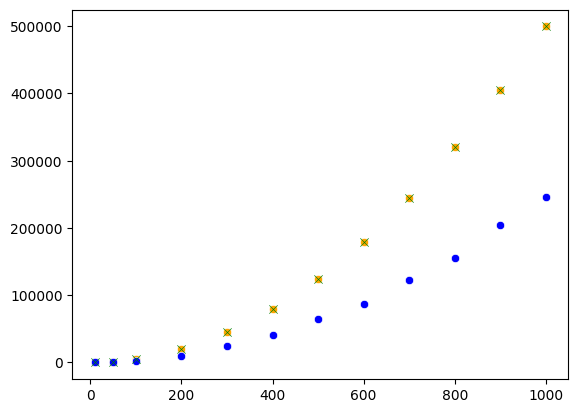

In [45]:
import seaborn as sns
sns.scatterplot(x=tailles, y=compteur_selection, color="orange")
sns.scatterplot(x=tailles, y=compteur_insertion, color="blue")
sns.scatterplot(x=tailles, y=compteur_bulles, marker="x", color="green")
# On remarque que les tris à bulles et tris par sélection demandent plus de comparaisons que le tri par insertion.
# C'est cohérent : les tris à bulles et par sélection font toujours le même nombre de comparaisons, à savoir N(N-1)/2 où N est la taille
# de la liste. En revanche, si la liste est proche d'être bien triée, le tri par insertion fait moins de comparaisons. C'est seulement au
# max qu'il en fait N(N-1)/2

On cherche maintenant à estimer le temps de calcul pris par l'ordinateur pour trier une liste, ce qui est une autre forme de complexité.

Pour mesurer le temps d'exécution d'une cellule d'un notebook, une commande très basique mais facile d'utilisation est `%%timeit`. 
Pour l'utiliser il suffit d'écrire `%%timeit` au début de la cellule, et la sortie affichera le temps de calcul moyenné sur un certain nombre de répétitions du code contenu dans la cellule


**Exercice 6 :**

À l’aide de `%%timeit`, mesurez le temps nécessaire pour trier :
- 100 éléments 
- 1000 éléments
- 2000 éléments

Que remarquez vous ?

In [47]:
import timeit

In [48]:
%%timeit
L = construit_liste_aleatoire(100)
tri_selection(L)

113 μs ± 1.09 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [49]:
%%timeit
L = construit_liste_aleatoire(100)
tri_insertion(L)

195 μs ± 1.21 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [50]:
%%timeit
L = construit_liste_aleatoire(100)
tri_bulles(L)

222 μs ± 1.38 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [87]:
%%timeit
L = construit_liste_aleatoire(100)
tri_verif(L)

329 μs ± 635 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [75]:
%%timeit
L = construit_liste_aleatoire(100)
tri_fusion(L)

77.6 μs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [63]:
%%timeit
L = construit_liste_aleatoire(10) # On ne pourra pas faire beaucoup plus que des listes de taille 10 avec ce trie.
tri_chaos(L)

The slowest run took 248.25 times longer than the fastest. This could mean that an intermediate result is being cached.
4.75 s ± 4.28 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## (Pour aller plus loin) Récursivité et Recherche Dichotomique

L'utilisation d'une liste triée permet d'accélerer la recherche d'un élément. Ceci est primordial pour rendre efficaces l'accès aux base de données nécessaires dans de nombreuses applications tel que les recherches sur wikipedia ou google, la gestion de transactions bancaires automatisées, l’analyse de données épidémiologiques, etc...

L'algorithme le plus simple pour retrouver un élément rapidement dans une liste d'éléments triés est appellé *recherche dichotomique*.

Supposons que vous souhaitiez savoir si un élément `x` appartient ou non à une liste triée d'éléments `l`.

Le principe de la recherche dichotomique est le même que celui que vous utilisez pour retrouver un mot dans le dictionnaire ou pour gagner en un nombre de coups idéal au jeu du "Juste prix" :
1. Choisissez l'élément central de votre liste `l`, que l’on appelera pivot. 
2. Comparez l'élément cherché `x` au pivot.
    - Si `x == pivot`, alors vous avez trouvé l'élément
    - Si `x < pivot`, comme la liste est triée de manière croissante, on sait que cela ne sert à rien de chercher `x` sur les éléments à droite de `pivot`. Donc on restreint la recherche à la partie gauche de la liste par rapport à `pivot` et on recommencera les opérations ci-dessus.
    - Si `x > pivot`, même raisonnement : on restreint la recherche à la partie droite de la liste par rapport à `pivot` et on recommencer les opérations ci-dessus.

**Exercice 7 :**

Implémentez l'algorithme de recherche d'élément dichotomique et testez-le sur plusieurs exemples. **L'utilisation de la récursivité facilitera l’implémentation.**



In [57]:
def recherche_dichotomie(x,l): #fonction qui indique si x est dans la liste l, supposée triée
    if len(l) == 1 :
        return x == l[0]
    return recherche_dichotomie(x,l[:len(l)//2]) or recherche_dichotomie(x,l[len(l)//2:])

"""
# Version sans récursivité.

def recherche_dichotomie(x,l): #fonction qui indique si x est dans la liste l triée
    a = 0 #borne inférieur de l'intervalle auquel on se restreint au fur et à mesure de la dichotomie
    b = len(l)-1 #borne supérieure
    while a <= b:
        c = (a+b)//2
        pivot = l[c]
        if x == pivot :
            return True
        if x < pivot :
            b = c-1
        else :
            a = c+1
    return False
"""

"\n#Version sans récursivité\ndef recherche_dichotomie(x,l): #fonction qui indique si x est dans la liste l triée\n    a = 0 #borne inférieur de l'intervalle auquel on se restreint au fur et à mesure de la dichotomie\n    b = len(l)-1 #borne supérieure\n    while a <= b:\n        c = (a+b)//2\n        pivot = l[c]\n        if x == pivot :\n            return True\n        if x < pivot :\n            b = c-1\n        else :\n            a = c+1\n    return False\n"

In [58]:
print(recherche_dichotomie(3,[1,2,3]))
print(recherche_dichotomie(3,[1,1,1,1,2,4]))
print(recherche_dichotomie(3,[3,3.1,4,5.5]))
print(recherche_dichotomie(3,[1,1.1,1.2,2.999,3.0001,500]))

True
False
True
False
